<a href="https://colab.research.google.com/github/sagarikabolla/Customer-segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/apps.csv.zip")

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,1169
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [ ]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '', regex=False).astype(int)
df['Price'] = df['Price'].replace('$', '', regex=True).astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:
print("Null Values:\n", df.isnull().sum())

Null Values:
 App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 981.1+ KB
None


In [ ]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '', regex=False).astype(int)


In [ ]:
df = df.dropna(subset=['Rating'])


/tmp/ipython-input-4277584508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rating.values, y=category_rating.index, palette="viridis")


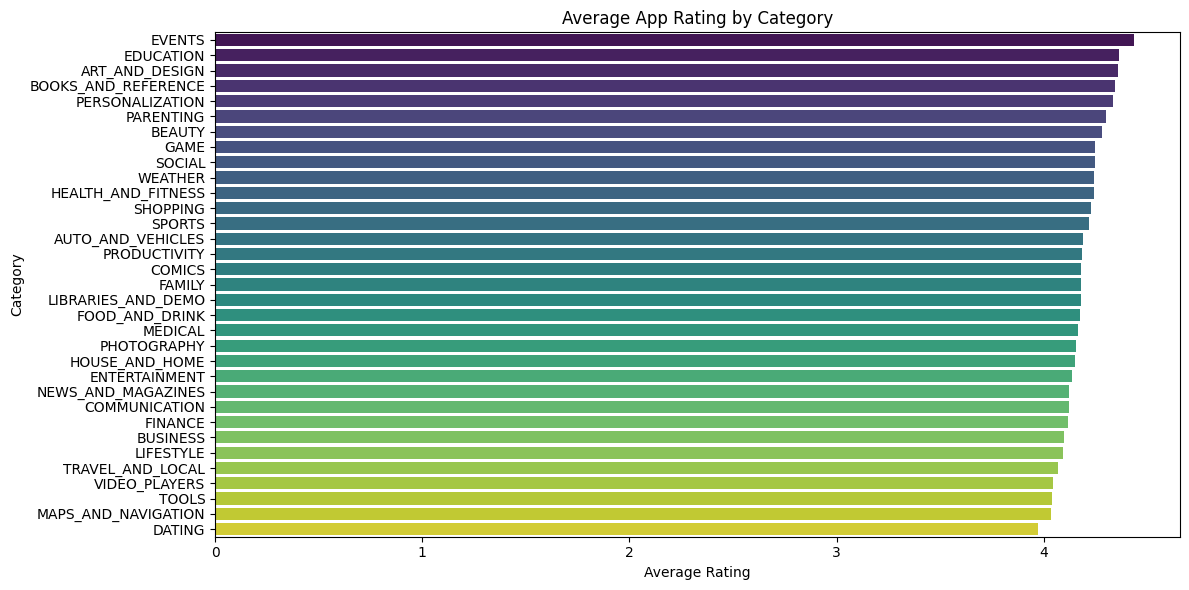

In [ ]:
plt.figure(figsize=(12, 6))
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_rating.values, y=category_rating.index, palette="viridis")
plt.title("Average App Rating by Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

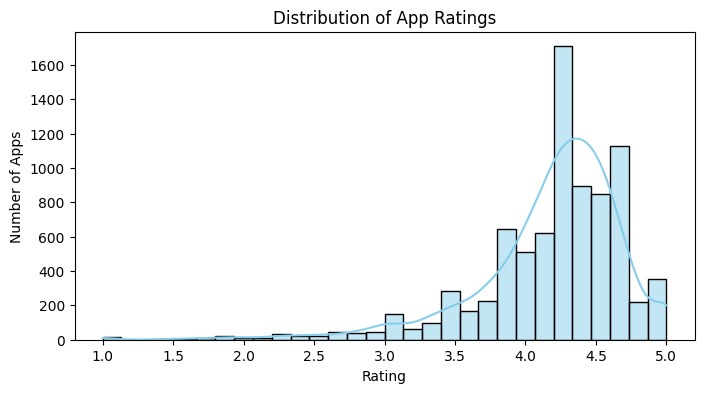

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.show()

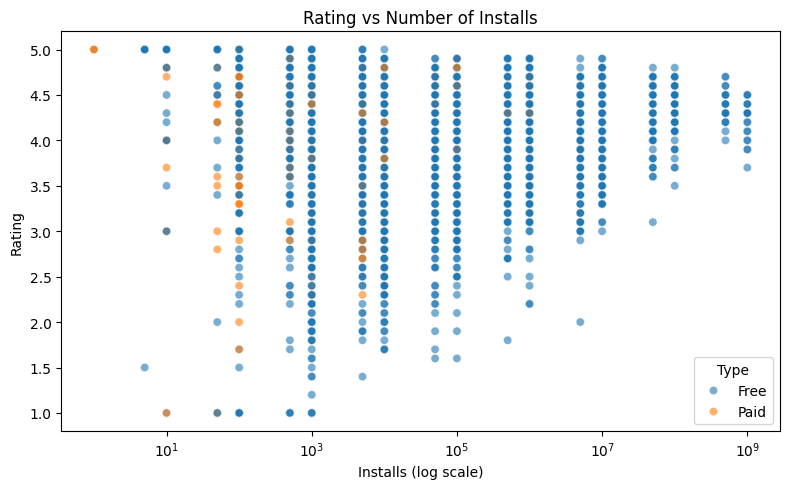

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Installs', y='Rating', data=df, hue='Type', alpha=0.6)
plt.xscale('log')
plt.title("Rating vs Number of Installs")
plt.xlabel("Installs (log scale)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

/tmp/ipython-input-186057177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content Rating', palette='pastel')


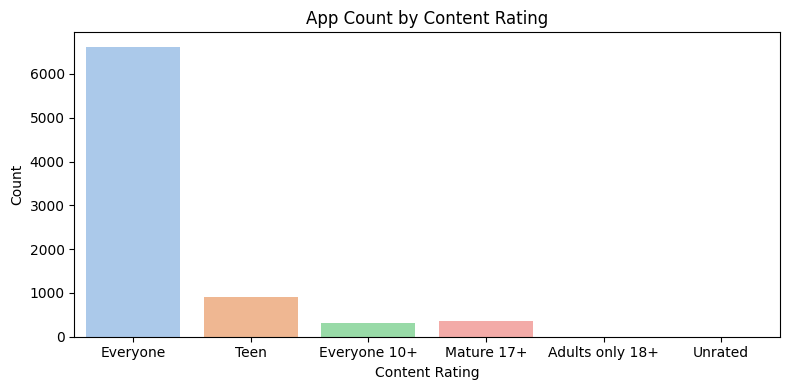

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Content Rating', palette='pastel')
plt.title("App Count by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()